## **AI Agents**

- Pr.Mohamed YOUSSFI, 
- ENSET Mohammedia, UNiversité Hassan II de Casablanca

An AI Agent, as described by the ReaAct Framework, is an autonomous entity with a goal that can: 
- Reason based on context (environmental abstraction) 
- Act autonomously on its environment 
- Collect observations about the environment


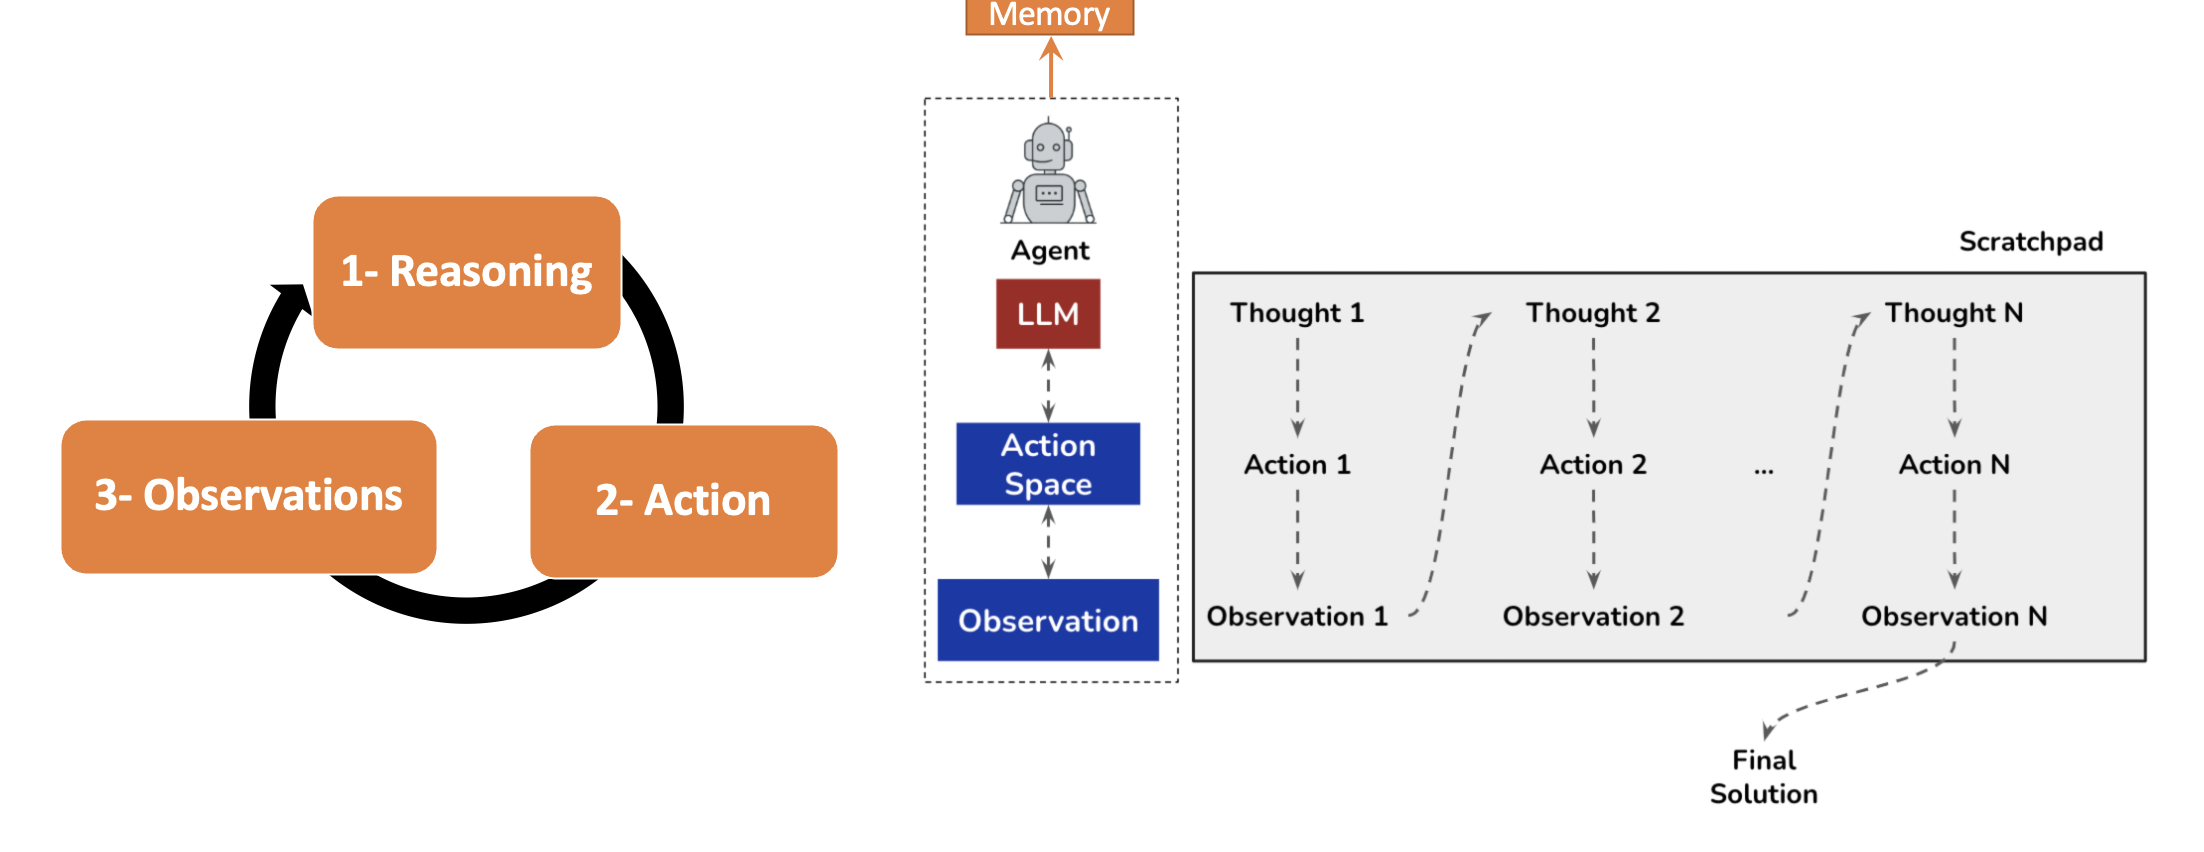

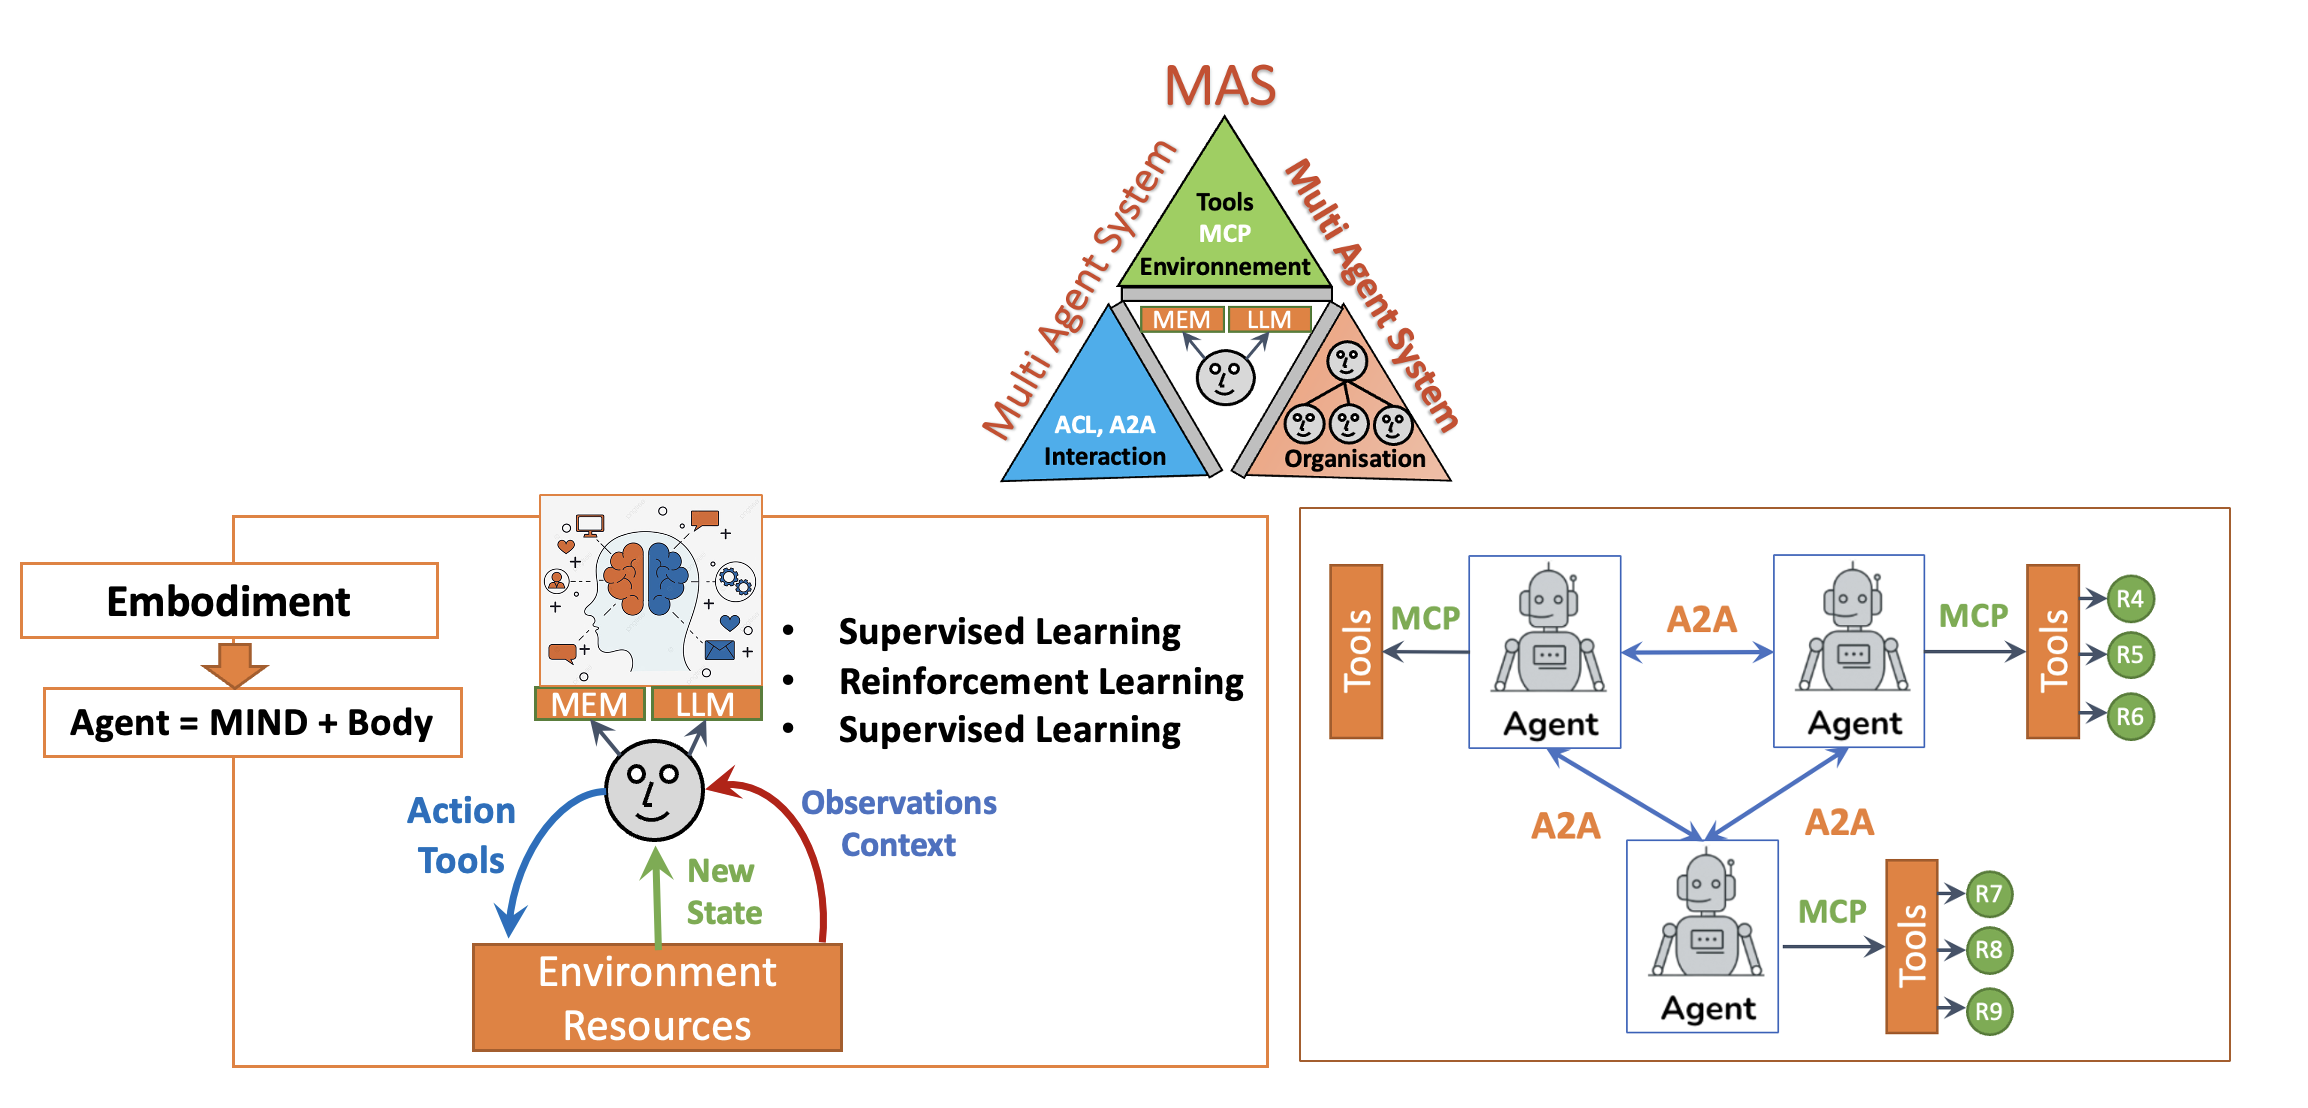

- **pyproject.toml**
<pre>
[project]
name = "test"
version = "0.1.0"
description = "Add your description here"
readme = "README.md"
requires-python = ">=3.11"
dependencies = [
    "duckduckgo-search>=8.0.1",
    "ipykernel>=6.29.5",
    "openai-agents[viz]>=0.0.14",
    "pydantic>=2.11.4",
    "python-dotenv>=1.1.0",
    "streamlit>=1.45.0",
]
</pre>

In [5]:
from dotenv import load_dotenv
import os
from IPython.display import Markdown

In [2]:
load_dotenv()

True

In [3]:
api_key = os.environ.get('OPENAI_API_KEY')
if not api_key:
    raise("API KEY not available")

In [4]:
from agents import Agent, Runner, OpenAIChatCompletionsModel, AsyncOpenAI

### Agent

- Using OpenAI Model

In [ ]:
cost_medico_agent = Agent(
    name="Doctor Agent",
    model="gpt-4o", 
    instructions="""
    Donne moi des conseils concernant la pathologie fournie par l'utilisateur
    """
    )
result =  await(Runner.run(cost_medico_agent,"Cardiologie"))

In [11]:
display(Markdown(result.final_output))

En ce qui concerne la cardiologie, il est important de prendre soin de la santé cardiovasculaire en suivant plusieurs conseils généraux:

1. **Alimentation équilibrée** : Adopte un régime riche en fruits, légumes, grains entiers, protéines maigres et acides gras oméga-3 (présents dans le poisson, les noix et les graines).

2. **Activité physique régulière** : Vise au moins 150 minutes d’exercice modéré par semaine, comme la marche rapide, la natation ou le vélo.

3. **Gestion du stress** : Pratiques comme le yoga, la méditation ou des exercices de respiration peuvent aider à réduire le stress.

4. **Arrêt du tabac** : Si tu fumes, chercher de l’aide pour arrêter peut drastiquement améliorer ta santé cardiaque.

5. **Contrôle de la pression artérielle et du cholestérol** : Effectue des contrôles réguliers et prends les mesures nécessaires si les niveaux sont élevés.

6. **Maintien d’un poids sain** : Un poids adéquat peut réduire le risque de maladies cardiovasculaires.

7. **Modération de la consommation d'alcool** : Limite ta consommation d’alcool si tu choisis de boire.

8. **Suivi médical** : Effectue des bilans de santé réguliers pour détecter précocement les problèmes.

Si tu as des soucis spécifiques ou un diagnostic, il est important de consulter un cardiologue pour un plan de traitement adapté à ton cas.

- Using Open source LIAMMA Model

In [7]:
lamma_model = OpenAIChatCompletionsModel(
    model="llama3.2",
    openai_client= AsyncOpenAI(base_url="http://localhost:11434/v1")
)

In [ ]:
free_medico_agent = Agent(
    name="Doctor Agent",
    model=lamma_model, 
    instructions="""
    Donne moi des conseils concernant la pathologie fournie par l'utilisateur
    """
    )
result =  await(Runner.run(free_medico_agent,"Cardiologie"))

In [9]:
display(Markdown(result.final_output))

Voici quelques informations générales et conseils relatifs à la cardiologie :

**Qu'est-ce que le cœur ?**

Le cœur est un organe essentiel de notre corps qui frappe sur environ 100 000 fois par jour. Il est responsable de pousser l' oxygène à travers les artères et d'amener à retourner au cœur le déchet, comme les déchets du cerveau. Le cœur est établi à la base du torso.

**Les troubles cardiaques**

Il existe une large gamme de maladies cardiovasculaires qui affectent millions de personnes dans le monde entier. Voici quelques exemples :

1. **Insuffisance cardiaque**: Lorsqu'elles ne fonctionnent pas avec suffisamment pour fournir les doses nécessaires à tout le corps, les organes peuvent s'empirer.
2. **Coronaropathie** : Cette maladie est due au stress des artères. Tout ce que vous avez besoin de faire, c'est que votre système d'ongulates réagisse très bien avec une pression.
3. **Aortique et pulmonaire hypertension**: le risque de stent ou d’assister à un cedran
4. **Arérodite hémorragique** : sache qu'il y a peut-être des problèmes en cas d'hémorragie 
5.  **Anomalies du coeur (AESC)**

### **Structured Output**

In [13]:
from pydantic import BaseModel

In [14]:
class Recipe(BaseModel):
    title : str
    ingredients : list[str]
    cooking_time : int
    servings : int

In [15]:
recipe_agent = Agent(
    name = "Recipe Agent",
    model="gpt-4o", 
    instructions= """ 
    You are an agent for creating Recipes
    You will be given the name of the food to create
    You job is to create this food as an actual detailed recipe
    The cooking time should be in minutes
    """,
    output_type= Recipe
)

In [20]:
response = await Runner.run(recipe_agent,"Tajine Marocain en Arabe")
recipe = response.final_output

In [21]:
print("*"*40)
print(f"Title : {recipe.title}")
print(f"Time : {recipe.cooking_time} minutes")
print(f"Servings : {recipe.servings}")
for ing in recipe.ingredients:
    print(f"- {ing}")

****************************************
Title : طاجين مغربي
Time : 120 minutes
Servings : 4
- 1 كغ من لحم الغنم (أو الدجاج حسب الرغبة)
- 2 بصلات متوسطة الحجم، مقطعة إلى شرائح
- 3 فصوص ثوم مفرومة
- 4 ملاعق كبيرة من زيت الزيتون
- 1 ملعقة صغيرة من الزنجبيل المطحون
- 1 ملعقة صغيرة من الكركم
- 1 ملعقة صغيرة من القرفة
- ملح وفلفل حسب الرغبة
- 100 غرام من الزبيب
- 100 غرام من اللوز المقلي
- عصير نصف ليمونة
- 2 كوب من الماء
- حفنة من الكزبرة الطازجة، مفرومة للزينة
- 200 غرام من الخضروات الموسمية (مثل الجزر والبطاطس)، مقطعة


### **Tools**

In [29]:
from agents import Agent, function_tool, WebSearchTool

In [24]:
@function_tool
def get_weather(city : str) -> str:
    """
    Get the weather of a given city
    """
    print(f"The tool get_weather is used by the agent to get the weather of the {city}")
    return f"The weather of {city} is sunny"

In [26]:
@function_tool
def get_temperature(city : str) -> str:
    """
    Get the teperature in a given city
    """
    print(f"The tool get_temperature is used by the agent to get the temperature of the {city}")
    return f"it is 50° In {city}"

In [ ]:
weather_agent = Agent (
    name="The Weather Agent",
    instructions="""
                  As the local weather agent, you will be asked to give information 
                  about weather of a given city,
                  Your output should include weather information asked by the user"
                  """,
    tools=[get_weather, get_temperature]
)

In [32]:
response = await Runner.run(weather_agent, "The temperature and weather in Marrakech")
response.final_output

The tool get_weather is used by the agent to get the weather of the Marrakech
The tool get_temperature is used by the agent to get the temperature of the Marrakech


'The weather in Marrakech is sunny, with a temperature of 50°F.'

In [33]:
response = await Runner.run(weather_agent, "Quel temps fera t-il demain à Tanger")
response.final_output

The tool get_weather is used by the agent to get the weather of the Tanger


'Demain à Tanger, le temps sera ensoleillé. ☀️'

In [45]:
search_agent = Agent(
    name= "Search Agent",
    instructions= """
    You are a news reporter, 
    your job is to search new recent articles using internet about a given country
    """,
    tools=[WebSearchTool()]
)

In [46]:
response = await Runner.run(search_agent, "Les actualités au Maroc")

In [47]:
display(Markdown(response.final_output))

Voici un aperçu des actualités récentes au Maroc :

**Économie et Entreprises**

- **Partenariat stratégique entre Maroc Telecom et Inwi** : Le 27 mars 2025, Maroc Telecom et Inwi ont annoncé un partenariat visant à mutualiser les investissements dans le déploiement de la fibre optique et du réseau mobile 5G. Deux coentreprises, FiberCo et TowerCo, seront créées pour atteindre respectivement 1 million de prises fibre et 2 000 tours télécoms en trois ans. L'investissement initial est estimé à 4,4 milliards de dirhams. ([fr.wikipedia.org](https://fr.wikipedia.org/wiki/Maroc_Telecom?utm_source=openai))

- **Royal Air Maroc adopte une flotte automobile 100 % électrique** : Le 19 mars 2025, Royal Air Maroc est devenue la première entreprise marocaine à disposer d'un parc automobile entièrement électrique, illustrant son engagement en faveur de l'environnement. ([lenouvelliste.ma](https://www.lenouvelliste.ma/?utm_source=openai))

**Culture et Société**

- **Décès de l'artiste Mustafa Al-Zaari** : L'éminent acteur marocain Mustafa Al-Zaari est décédé le 18 mars 2025 à l'âge de 79 ans, après une longue lutte contre le cancer. Il était reconnu pour ses nombreuses contributions au théâtre, au cinéma et à la télévision marocains. ([news.dayfr.com](https://news.dayfr.com/aujourd/4029716.html?utm_source=openai))

- **Festival International d’Improvisation du Maroc 2025** : La 6ᵉ édition de ce festival s'est tenue du 3 au 5 avril 2025 à Rabat et Casablanca, mettant en avant l'art de l'improvisation théâtrale avec la participation d'artistes nationaux et internationaux. ([lenouvelliste.ma](https://www.lenouvelliste.ma/?utm_source=openai))

**Tourisme**

- **Record d'affluence touristique en 2024** : Le Maroc a accueilli 17,4 millions de visiteurs en 2024, marquant une hausse de 20 % par rapport à l'année précédente. Cette performance est attribuée aux investissements ciblés du gouvernement et à l'amélioration de la connectivité aérienne. ([fr.wikipedia.org](https://fr.wikipedia.org/wiki/Tourisme_au_Maroc?utm_source=openai))

**Politique et Relations Internationales**

- **Visite d'État d'Emmanuel Macron au Maroc** : Du 28 au 30 octobre 2024, le président français Emmanuel Macron a effectué une visite d'État au Maroc, visant à renforcer le partenariat stratégique entre les deux pays, notamment sur les questions bilatérales et régionales. ([fr.wikipedia.org](https://fr.wikipedia.org/wiki/Relations_entre_la_France_et_le_Maroc?utm_source=openai))

**Infrastructures et Développement**

- **Grand Théâtre de Rabat toujours fermé** : Bien que terminé depuis 2021, le Grand Théâtre de Rabat, considéré comme le plus grand d'Afrique avec une capacité de 1 800 places, reste fermé en attente de son inauguration officielle. ([lemonde.fr](https://www.lemonde.fr/afrique/article/2024/10/09/le-maroc-a-le-theatre-le-plus-grand-d-afrique-mais-il-est-toujours-ferme_6347119_3212.html?utm_source=openai))

**Archéologie**

- **Découverte d'un complexe agricole de 5 000 ans** : En septembre 2024, des archéologues ont mis au jour à Oued Beht, près de Rabat, l'un des plus anciens et vastes complexes agricoles d'Afrique, datant de 5 000 ans. ([lemonde.fr](https://www.lemonde.fr/afrique/article/2024/09/26/au-maroc-decouverte-d-un-complexe-agricole-vieux-de-5-000-ans-l-un-des-plus-anciens-et-des-plus-vastes-d-afrique_6334770_3212.html?utm_source=openai))


## Actualités récentes au Maroc:
- [Au Maroc, des familles moins grandes et plus urbaines, selon le dernier recensement](https://www.lemonde.fr/afrique/article/2024/11/15/au-maroc-des-familles-moins-grandes-et-plus-urbaines-selon-le-dernier-recensement_6395551_3212.html?utm_source=openai)
- [Au Maroc, découverte d'un complexe agricole vieux de 5 000 ans, l'un des plus anciens et des plus vastes d'Afrique](https://www.lemonde.fr/afrique/article/2024/09/26/au-maroc-decouverte-d-un-complexe-agricole-vieux-de-5-000-ans-l-un-des-plus-anciens-et-des-plus-vastes-d-afrique_6334770_3212.html?utm_source=openai)
- [Le Maroc a le théâtre « le plus grand d'Afrique », mais il est toujours fermé](https://www.lemonde.fr/afrique/article/2024/10/09/le-maroc-a-le-theatre-le-plus-grand-d-afrique-mais-il-est-toujours-ferme_6347119_3212.html?utm_source=openai) 

In [49]:
from duckduckgo_search import DDGS
from datetime import datetime

In [50]:
now = datetime.now().strftime("%Y-%m-%d")
now

'2025-05-11'

In [51]:
@function_tool
def get_news_articles(topic:str):
    print(f"Running DuckDuckSearch for news in topic : {topic}")
    ddgs_api = DDGS()
    results = ddgs_api.text(f"{topic}, {now}", max_results=5)
    return results

In [52]:
search_agent = Agent(
    name= "Search Agent",
    instructions= """
    You are a news reporter, 
    your job is to search new recent articles using internet about a given country
    """,
    tools=[get_news_articles]
    )

In [55]:
response = await Runner.run(search_agent, "Les actualités au Maroc en arabe")

Running DuckDuckSearch for news in topic : المغرب


In [56]:
display(Markdown(response.final_output))

### آخر الأخبار حول المغرب

1. **حكومة بيدرو سانشيز تمنح المغرب 340 مليون يورو لبناء مشروع محطة تحلية المياه**
   - الرابط: [اقرأ المزيد](https://www.siyassi.com/date/2025/05/11/)
   - مقتطف: حكومة بيدرو سانشيز منحت المغرب مبلغ 340 مليون يورو لتمويل مشروع محطة لتحلية المياه...

2. **التقويم والأعياد الرسمية للمغرب سنة 2025**
   - الرابط: [اقرأ المزيد](https://www.calendarglobal.co/ar/morocco/2025/)
   - مقتطف: تشمل العطل الرسمية في المغرب عام 2025 رأس السنة الجديدة وذكرى بيان الاستقلال...

3. **المملكة المغربية لسنة 2025 - تفاصيل العطل**
   - الرابط: [اقرأ المزيد](https://www.calendarz.com/ar/morocco-holidays/2025?page=1)
   - مقتطف: قائمة المملكة المغربية لسنة 2025 وتفاصيل كل عطلة...

يمكنك متابعة المزيد من الأخبار والمقالات من خلال الروابط أعلاه.

### **Handoffs**

In [58]:
from agents import Agent
from pydantic import BaseModel

In [59]:
class Tutorial(BaseModel):
    outline : str
    tutorial : str

In [ ]:
tutorial_generator_agent = Agent(
    name="Tutorial Generator Agent",
    handoff_description= "Used to generate tutorial for a given outline",
    instructions="""
        Given a programming topic and an outline, 
        your job is to generate code snippets for each section of the outline,
        Format the tutorial in Markdown using a mix of text explaination and code snippets examples",
        Include comments in the code snippets to further explain the code"
    """,
    output_type=Tutorial
)

In [62]:
outline_builder_agent = Agent(
    name= "Outline builder agent",
    instructions="""
        Given a particular programming topic, your joc is to generate a tutorial by crafting an ouline
        After making the outline, hand it to the tutorial generator agent"
    """,
    handoffs=[tutorial_generator_agent]
)

In [ ]:
tutorial_response = await Runner.run(outline_builder_agent,
                                     "Boucles en Java avec des explications en Français")
tuto = tutorial_response.final_output

In [64]:
from IPython.display import Markdown
from agents.extensions.visualization import draw_graph

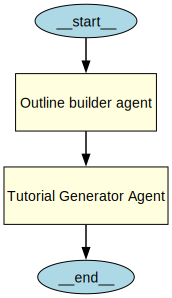

In [65]:
draw_graph(outline_builder_agent)

In [87]:
display(Markdown("### Outline :"))
display(Markdown(tuto.outline))
print("*"*60)
display(Markdown("### Totorial :"))
display(Markdown(tutorial_response.final_output.tutorial))

### Outline :

1. Introduction aux boucles
   - Pourquoi utiliser les boucles
   - Types de boucles en Java

2. La boucle `for`
   - Syntaxe de base
   - Exemple simple
   - Utilisation pour les tableaux

3. La boucle `while`
   - Syntaxe de base
   - Exemple simple
   - Comparaison avec `for`

4. La boucle `do-while`
   - Syntaxe de base
   - Exemple simple
   - Différences avec `while`

5. Utilisation des boucles imbriquées
   - Définition et utilité
   - Exemple d'application

6. Les instructions de contrôle
   - `break` et `continue`
   - Cas d'utilisation

7. Bonnes pratiques et erreurs courantes
   - Optimisation des boucles
   - Éviter les boucles infinies

8. Conclusion
   - Récapitulation des points clés
   - Importance des boucles en programmation

************************************************************


### Totorial :

### 1. Introduction aux boucles

Les boucles sont des structures fondamentales de la programmation permettant d'exécuter une séquence d'instructions plusieurs fois. Elles simplifient les opérations répétitives et sont essentielles pour traiter des collections, réaliser des processus calculatoires étendus, et bien plus encore.

Java propose plusieurs types de boucles, notamment la boucle `for`, la boucle `while`, et la boucle `do-while`. Chacune possède des caractéristiques uniques adaptées à différents scénarios.

---

### 2. La boucle `for`

#### Syntaxe de base

La structure de la boucle `for` en Java est la suivante:

```java
for(initialization; condition; update) {
    // instructions à répéter
}
```

- **initialization**: initialise une variable de contrôle de boucle.
- **condition**: teste la condition de continuation de la boucle.
- **update**: met à jour la variable de contrôle après chaque itération.

#### Exemple simple

```java
for(int i = 0; i < 5; i++) {
    System.out.println("i = " + i);
}
```

Ce programme affiche les valeurs de `i` de 0 à 4.

#### Utilisation pour les tableaux

La boucle `for` est souvent utilisée pour parcourir un tableau:

```java
int[] nombres = {2, 4, 6, 8};
for(int i = 0; i < nombres.length; i++) {
    System.out.println(nombres[i]);
}
```

---

### 3. La boucle `while`

#### Syntaxe de base

La boucle `while` s'écrit ainsi:

```java
while(condition) {
    // instructions à répéter
}
```

#### Exemple simple

```java
int i = 0;
while(i < 5) {
    System.out.println("i = " + i);
    i++;
}
```

#### Comparaison avec `for`

La boucle `while` convient lorsque le nombre d'itérations n'est pas connu à l'avance.

---

### 4. La boucle `do-while`

#### Syntaxe de base

La boucle `do-while` garantit une exécution au moins une fois:

```java
do {
    // instructions à répéter
} while(condition);
```

#### Exemple simple

```java
int i = 0;
do {
    System.out.println("i = " + i);
    i++;
} while(i < 5);
```

---

### 5. Utilisation des boucles imbriquées

Les boucles peuvent être imbriquées pour traiter des structures complexes comme les matrices:

```java
for(int i = 0; i < 3; i++) {
    for(int j = 0; j < 3; j++) {
        System.out.println("i = " + i + ", j = " + j);
    }
}
```

---

### 6. Les instructions de contrôle

- **`break`**: interrompt la boucle immédiatement.
  
  ```java
  for(int i = 0; i < 5; i++) {
      if(i == 3) break;
      System.out.println(i);
  }
  ```

- **`continue`**: passe à l'itération suivante de la boucle.
  
  ```java
  for(int i = 0; i < 5; i++) {
      if(i == 3) continue;
      System.out.println(i);
  }
  ```

---

### 7. Bonnes pratiques et erreurs courantes

- **Optimisation**: Évitez de complexifier inutilement la condition ou les mises à jour dans les boucles.
- **Boucles infinies**: Vérifiez toujours que les conditions permettent de sortir correctement de la boucle.

---

### 8. Conclusion

Les boucles sont essentielles pour rendre les programmes plus flexibles et efficaces. Comprendre l'utilisation appropriée de chaque type de boucle permet de résoudre divers problèmes de manière élégante et performante.

### **Triage Agent**

In [71]:
from agents import Agent, handoff, RunContextWrapper, function_tool
from agents.extensions.visualization import draw_graph

In [73]:
@function_tool
def get_teacher_name(course : str):
    """
    Get The teacher name if course (Mathematics, History)
    """
    if(course=='Mathematics'):
        return "Pr. Hassan"
    else:
        return "Pr. Najlaa"

In [86]:
history_agent = Agent(
    name= "History Agent",
    handoff_description= "Specialist Agent for historical questions",
    instructions="""
        You provide asistant with the historical queries
        Explain important events and context clearlly
    """,
    tools= [get_teacher_name]
)

In [87]:
math_agent = Agent(
    name= "Matimatical Agent",
    handoff_description= "Specialist Agent for matimatical questions",
    instructions= """
        You provide asistant with the matimatical queries
        Explain your reasoning at each step and include examples
        """,
    tools= [get_teacher_name]
)

In [88]:
triage_agent = Agent(
    name= "Triage Agent",
    instructions="""
        Answer the user question by delegating the task to the apropriate agent,
        If neither agent is relevant, give a general response
    """,
    handoffs=[history_agent, math_agent]
)

In [ ]:
trial_response = await Runner.run(triage_agent,
        "How do i multiply X by y and give me the name of teacher")

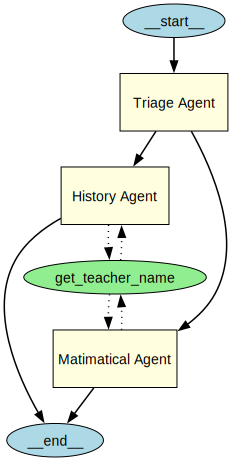

In [93]:
draw_graph(triage_agent)

In [94]:
display(Markdown(trial_response.final_output))

To multiply two numbers, \( x \) and \( y \), follow these steps:

1. **Understand the Multiplication:** 
    Multiplication is a shortcut for repeated addition. For example, \( x \times y \) means you add \( x \), \( y \) times.

2. **Perform the Multiplication:**
   - If both \( x \) and \( y \) are positive integers, multiply them directly.
   - For example, if \( x = 3 \) and \( y = 4 \), then \( 3 \times 4 = 12 \).

3. **Use a Calculator for Complex Numbers:**
   - For large or decimal numbers, you might want to use a calculator.

4. **Special Properties:**
   - **Zero Property:** Any number multiplied by 0 is 0. 
     - E.g., \( 5 \times 0 = 0 \).
   - **Identity Property:** Any number multiplied by 1 remains unchanged.
     - E.g., \( 7 \times 1 = 7 \).

The Mathematics teacher is Pr. Hassan.

In [101]:
trial_response = await Runner.run(triage_agent,"What is the history of Marrakech and provide the name of teacher")

In [102]:
display(Markdown(trial_response.final_output))

Marrakech, often referred to as the "Red City" due to its distinct red sandstone buildings, is a city in western Morocco with a rich and vibrant history. Here’s a brief overview:

### Founding and Early History:
- **Established:** Marrakech was founded in 1062 by Abu Bakr ibn Umar, a chieftain of the Almoravid dynasty.
- **Almoravid Dynasty:** It served as a political, economic, and cultural center for the Almoravids, a Berber Muslim dynasty. They introduced advanced irrigation techniques and architectural innovations.

### Golden Age:
- **Almohad Dynasty:** Marrakech reached its zenith during the reign of the Almohad dynasty in the 12th century. The city became a center for Islamic study and architecture.
- **Koutoubia Mosque:** Built during this period, it is one of the largest and oldest mosques in Marrakech and a masterpiece of Almohad architecture.

### Saadian and Alaouite Dynasties:
- **Saadian Dynasty (16th to 17th Century):** Marrakech experienced another golden age under the Saadian Sultan Ahmed al-Mansur who built grand palaces and the famous Saadian Tombs.
- **Alaouite Dynasty:** This dynasty, which still rules Morocco today, contributed to the decline of Marrakech as the capital shifted to Meknes and then to Rabat.

### Colonial and Modern Era:
- **French Protectorate (1912-1956):** During French rule, Marrakech saw significant urban development. The Ville Nouvelle, or Gueliz, was built during this period.
- **Post-Independence:** Since Morocco's independence in 1956, Marrakech has become a major economic and tourist center, attracting millions of visitors annually.

Today, Marrakech is renowned for its historical sites, vibrant souks, beautiful gardens, and cultural festivals. The city's medina was declared a UNESCO World Heritage Site in 1985.

If you want to learn more in-depth history, Pr. Najlaa teaches History.

In [103]:
def on_history_handoff(ctx : RunContextWrapper[None]):
    print ("="*60)
    print ("History Agent is Invoqued")
    print ("="*60)

def on_math_handoff(ctx : RunContextWrapper[None]):
    print ("*"*60)
    print ("Math Agent is Invoqued")
    print ("*"*60)

In [104]:
triage_agent = Agent(
    name= "Triage Agent",
    instructions="""
        Answer the user question by delegating the task to the apropriate agent,
        If neither agent is relevant, give a general response
    """,
    handoffs=[
        handoff(history_agent, on_handoff=on_history_handoff),
        handoff(math_agent, on_handoff=on_math_handoff)
               ]
)

In [105]:
trial_response = await Runner.run(triage_agent,"How do i multiply X by y")

************************************************************
Math Agent is Invoqued
************************************************************


In [106]:
trial_response = await Runner.run(triage_agent,"HISTORY OF Rabat")

History Agent is Invoqued


In [107]:
trial_response = await Runner.run(triage_agent,"C'est quoi l'ENSET")
display(Markdown(trial_response.final_output))

L'ENSET (École Normale Supérieure de l'Enseignement Technique) est une institution d'enseignement supérieur qui forme des enseignants pour les disciplines techniques et professionnelles. Elle est souvent rattachée à une université et propose des programmes de formation pour préparer les futurs enseignants à transmettre des connaissances techniques dans divers domaines tels que l'ingénierie, la technologie, et l'informatique. Les programmes peuvent inclure des études théoriques ainsi que des stages pratiques pour compléter la formation pédagogique.

### **Traces**

In [108]:
from agents import trace

https://platform.openai.com/traces

In [109]:
with trace("Triage Work Flow"):
    trial_response = await Runner.run(triage_agent,"Hitoire de Rabat")
    trial_response.final_output
    

History Agent is Invoqued


### **Streaming**

In [110]:
from openai.types.responses import ResponseTextDeltaEvent
joke_agent = Agent(
    name="My Agent",
    model='gpt-4o', 
    instructions="You are a joke teller. you are giving a topic and you will tell 10 jokes about it"
)
result =  Runner.run_streamed(joke_agent,"Food")
async for event in result.stream_events():
    if event.type=='raw_response_event' and isinstance(event.data, ResponseTextDeltaEvent):
        print(event.data.delta, end="", flush=True)

Sure thing! Here are 10 food jokes for you:

1. Why did the tomato turn red?  
   Because it saw the salad dressing!

2. What did the taco say to the burrito?  
   "I’m nacho friend anymore!"

3. Why don’t eggs tell jokes?  
   They might crack up!

4. What do you call cheese that's not yours?  
   Nacho cheese!

5. How do you fix a broken pizza?  
   With tomato paste!

6. Why did the lettuce win the race?  
   Because it was ahead!

7. What did the grape do when it got stepped on?  
   It let out a little wine!

8. Why did the banana go to the doctor?  
   It wasn’t peeling well!

9. What do you get if you divide the circumference of a pumpkin by its diameter?  
   Pumpkin pi!

10. What did the gingerbread man put on his bed?  
    A cookie sheet!

### **MCP : Model Context Protocol**

In [ ]:
import asyncio
import os
import shutil

from agents import Agent, Runner, gen_trace_id, trace
from agents.mcp import MCPServer, MCPServerStdio
from dotenv import load_dotenv

load_dotenv()


async def run(mcp_server: MCPServer):
    agent = Agent(
        name="Assistant",
        instructions="Use the tools to read the filesystem and answer questions based on those files.",
        mcp_servers=[mcp_server],
    )

    # List the files it can read
    message = "Read the files and list them."
    print(f"Running: {message}")
    result = await Runner.run(starting_agent=agent, input=message)
    print(result.final_output)

    # Ask about books
    message = "What is my #1 favorite book?"
    print(f"\n\nRunning: {message}")
    result = await Runner.run(starting_agent=agent, input=message)
    print(result.final_output)

    # Ask a question that reads then reasons.
    message = "Look at my favorite songs. Suggest one new song that I might like."
    print(f"\n\nRunning: {message}")
    result = await Runner.run(starting_agent=agent, input=message)
    print(result.final_output)


async def main():
    current_dir = os.path.dirname(os.path.abspath(__file__))
    samples_dir = os.path.join(current_dir, "sample_files")
    os.makedirs(samples_dir, exist_ok=True)
    async with MCPServerStdio(
        name="Filesystem Server, via npx",
        params={
            "command": "npx",
            "args": ["-y", "@modelcontextprotocol/server-filesystem", samples_dir],
        },
    ) as server:
        trace_id = gen_trace_id()
        with trace(workflow_name="MCP Filesystem Example", trace_id=trace_id):
            print(
                f"View trace: https://platform.openai.com/traces/trace?trace_id={trace_id}\n"
            )
            await run(server)


if __name__ == "__main__":
    # Let's make sure the user has npx installed
    if not shutil.which("npx"):
        raise RuntimeError(
            "npx is not installed. Please install it with `npm install -g npx`."
        )

    asyncio.run(main())